<a href="https://colab.research.google.com/github/NMashalov/ODE-Numerical-Solutions/blob/main/ENO_%2B_%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A5%D0%BE%D0%BF%D1%84%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib.animation import FuncAnimation

from IPython.display import HTML

In [ ]:
%matplotlib inline

In [ ]:
# Функция анимации
# Анимация

def make_video(u,u_cor,name,y_down,y_up,x_up=1):
    fig_1=plt.figure(figsize=(12,8))
    ax_1=fig_1.add_subplot(1, 1, 1)
    ax_1.set_xlim(( 0, x_up))
    ax_1.set_ylim((y_down,y_up))
    ax_1.grid()
    ax_1.set(title=name)

    line1,= ax_1.plot([], [],lw=2,color="r",label="Численное решение")
    line2, = ax_1.plot([], [],lw=2,color="g",label="Точное решение")

    ax_1.legend()

    #Пропускаем кадры для ускорения
    counter=3
    def animate(i,counter,u,u_cor,X_steps):
        line1.set_data(np.linspace(0,x_up,X_steps),u[i*counter])
        line2.set_data(np.linspace(0,x_up,X_steps),u_cor[i*counter])
        return [line1,line2]


    anim = animation.FuncAnimation(fig_1, animate, fargs=[counter,u,u_cor,X_steps],
                                   frames=Time_steps//counter, interval=20, blit=True)

    plt.close(fig_1)


    return anim

# Уравнение Хопфа
$$ u_t+u \cdot u_x=0 $$
Решение этого уравнения представляет особый интерес для задач гидродинамики, физики плазмы, передвижения доменных стенок и даже регулирования дорожного движения.
<br>
Решение в аналитическом ищется методом характеристик.
$$ \frac{dx}{dt}=u, \frac{du}{dt}=0 $$
Тогда, если начальные условия задаются как $u(x,0)=u_0(x)$.
$$u=u_0(x-ut)$$
Полученное уравнение является неявным.
$$ F(x,t,u)=u-u_0(x-ut)=0 $$
Теорема о неявной функции из матанализа гарантирует, что решение единственно до тех пор пока:
$$ F'_u=1+\frac{\partial u_0(x-ut)}{\partial (x-ut)} \ne 0 $$
Отсюда следует, что начиная с момента времени $t^*=(max_x \mid \frac{\partial u_0}{\partial x}\mid)^{-1}$ происходит опрокидывание волны (градиентная катастрофа). Физический смысл опрокидывания состоит в том, что быстрые частицы среды догоняют более медленные, что приводит к укручению профиля волны u(x,t).
![image.png](attachment:image.png)
Из интеграла движения:
$$ u_t + (u^2/2)_x=0 $$
Получаем скорость распостранения разрыва.
$$ v=\frac{u(x_0-0)+u(x_0+0)}{2} $$

# ENO схема

![image.png](attachment:image.png)
Для решения задачи Хопфа поступаем аналогично, но вводим $F_x=(\frac{u^2}{2})_x$ вместо $u_x$. Первый ряд выстраиваем по схеме правого неявного уголка для соблюдения порядка аппроксимации:
$$F^{n+1}_{m+1}=(y^{n+1}_m-y^n_m) \frac{h}{\tau}+F^{n+1}_m$$
Отсюда:
$$u^{n+1}_{m+1}=\sqrt{2}*\sqrt{(y^{n+1}_m-y^n_m) \frac{h}{\tau}+\frac{(u^{n+1}_m)^2}{2}} $$
Последний ряд выстраиваем по абсолютно симметричной схеме для соблюдения порядка аппроксимации:
$$\frac{(y^{n+1}_m)^2}{2}+\frac{h}{\tau} y^{n+1}_m-\frac{h}{\tau}(-y^{n+1}_{m-1}+y^n_m+y^n_{m-1})+\frac{(y^{n}_m)^2}{2}-\frac{(y^{n}_{m-1})^2}{2}-\frac{(y^{n+1}_{m-1})^2}{2}=0$$
Квадратное уравнение:
$$a=1/2,b=\frac{h}{\tau},c=-\frac{h}{\tau}(-y^{n+1}_{m-1}+y^n_m+y^n_{m-1})+\frac{(y^{n}_m)^2}{2}-\frac{(y^{n}_{m-1})^2}{2}-\frac{(y^{n+1}_{m-1})^2}{2}$$

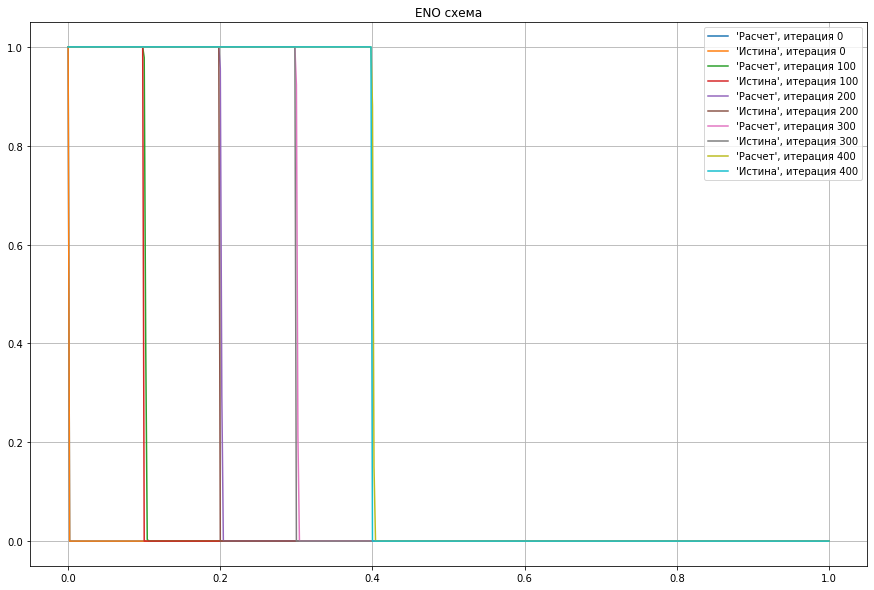

In [ ]:
#Число шагов по пространству
X_steps=501
dh=1/X_steps

dt=dh

#Получаем число временных шагов
Time_steps=int(1/dt)+1

#Расчетная сетка
x=np.linspace(0,1,X_steps)
dh=x[1]-x[0]

t=np.linspace(0,1,Time_steps)
dt=t[1]-t[0]


# Задаем начальные условия
u=np.zeros((Time_steps,X_steps))
#Задаем граничные условия
u[:,0]=1



a=0.5
b=dh/dt

sigma=dt/dh

#
u[1:,1]=2**0.5*((-u[1:,0]+u[:-1,0])*dh/dt+(u[1:,0]**2)/2)**0.5

#Расчётная схема
for n in range(Time_steps-1):
    for m in range(2,X_steps-1):
        # основной расчетный цикл (все кроме первого и последнего ряда выстраиваем по схеме ENO)
        u_m=abs(u[n,m]-u[n,m-1])
        u_p=abs(u[n,m+1]-u[n,m])
        if (u_p>=u_m):
            F_plus=0.5*(3-sigma)*u[n,m]*u[n,m]/2-0.5*(1-sigma)*u[n,m-1]*u[n,m-1]/2
            F_minus=0.5*(3-sigma)*u[n,m-1]*u[n,m-1]/2-0.5*(1-sigma)*u[n,m-2]*u[n,m-2]/2
        else:
            F_plus=0.5*(1+sigma)*u[n,m]*u[n,m]/2+0.5*(1-sigma)*u[n,m+1]*u[n,m+1]/2
            F_minus=0.5*(1+sigma)*u[n,m-1]*u[n,m-1]/2+0.5*(1-sigma)*u[n,m]*u[n,m]/2


        u[n+1,m]=u[n,m]-sigma*(F_plus-F_minus)

    # достраиваем последний элемент по абсолютно симметричной схеме

    c=-dh/dt*(-u[n+1,-2]+u[n,-1]+u[n,-2])+u[n,-1]**2/2-u[n,-2]**2/2-u[n+1,-2]**2/2

    #u[n+1,-1]=(-b+(b**2-4*a*c)**0.5)/(2*a)
    #u[n+1,-1]=2**0.5*((-u[n+1,-2]+u[n,-2])*dh/dt+(u[n+1,-2]**2)/2)**0.5



# Строим точное решение
u_cor=np.ones((Time_steps,X_steps))

for i in range(Time_steps-1):
    for j in range(X_steps-1,0,-1):
        if (abs(0.5)*dt*i<=j*dh):
            u_cor[i,j]=0

# Строим график
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1, 1, 1)

for i in range(0,Time_steps-10,Time_steps//5):
    ax.plot(x,u[i,:],label="'Расчет', итерация "+str(i))
    ax.plot(x,u_cor[i,:],label="'Истина', итерация "+str(i))


ax.legend()
ax.grid()
ax.set(title="ENO схема")
plt.show()

HTML(make_video(u,u_cor,"ENO cхема",-0.1,1.1).to_html5_video())